In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mdtraj as mdj
import nglview as nv

In [3]:
def measure_center(atom_positions):
    """mimic the VMD command "measure center"
    Args:
        atom_positions (numpy.array): a numpy array containing the XYZ coordinates of N atoms. The shape should be (N, 3).
    Returns:
        Numpy.array: a shape of (3,) array contains the geometric center
    """    

    xyz_array = np.transpose(atom_positions)
    center_x = np.average(xyz_array[0])
    center_y = np.average(xyz_array[1])
    center_z = np.average(xyz_array[2])
    return np.array([center_x, center_y, center_z])





In [4]:
pdb_crys = mdj.load('../BFEE_NAMD/complex.pdb')
protein_idxs = pdb_crys.top.select("protein and type!='H'")
pdb_crys_com = measure_center(pdb_crys.xyz[:, protein_idxs, :])
# in nm
print(pdb_crys_com)


/home/ndonyapour/miniconda3/envs/bfee2/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


[ 0.2616211 -0.0660068 -0.2134478]


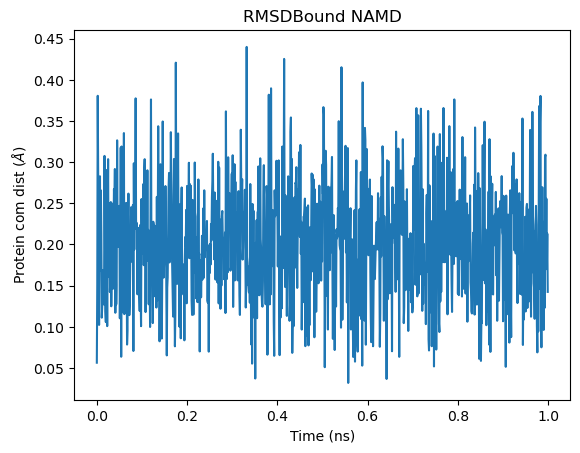

In [5]:
traj = mdj.load_dcd('../BFEE_NAMD/000_eq/output/eq.dcd', '../BFEE_NAMD/complex.pdb')
coms = mdj.compute_center_of_mass(traj, select='protein')
dist = np.linalg.norm(coms - pdb_crys_com, axis=1)
plt.plot(np.arange(dist.shape[0])/1000, dist*10)
plt.xlabel('Time (ns)')
plt.ylabel(r'Protein com dist ($\AA$)')
plt.title("RMSDBound NAMD")
plt.savefig('figures/rmsdbound_NAMD_protein_com_dist.png')

/home/ndonyapour/miniconda3/envs/bfee2/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


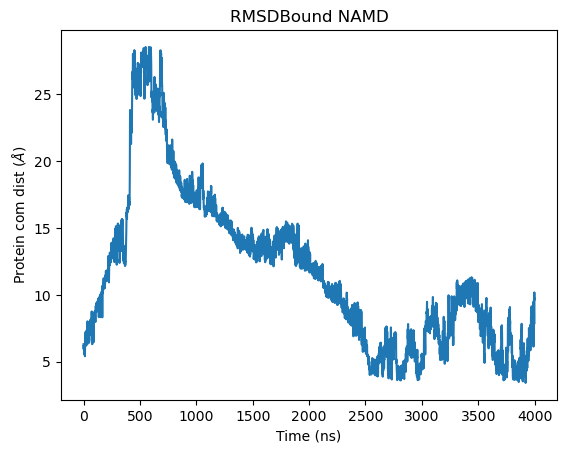

In [20]:
traj = mdj.load_dcd('../BFEE_NAMD/007_r/output/abf_1.dcd', '../BFEE_NAMD/007_r/complex_largeBox.pdb')
coms_prot = mdj.compute_center_of_mass(traj, select='protein and type!="H"')
coms_lig = mdj.compute_center_of_mass(traj, select='resname "MOL" and type!="H"')
dists = np.linalg.norm(coms_prot - coms_lig, axis=1) * 10
plt.plot(np.arange(dists.shape[0]), dists)
plt.xlabel('Time (ns)')
plt.ylabel(r'Protein com dist ($\AA$)')
plt.title("RMSDBound NAMD")
plt.savefig('figures/r_step_mdj_r.png')


In [25]:
r = 10
dr = 0.05
print(np.where((dists >= r) & (dists <= r+dr)))
print(dists[(dists >= r) & (dists <= r+dr)])

(array([ 160, 2159, 2196, 2212, 2229, 2264, 2266, 3319, 3322, 3351, 3358,
       3420, 3434, 3494]),)
[10.00555167 10.01779226 10.04460379 10.01973906 10.0279957  10.04316167
 10.03312686 10.04084345 10.0150841  10.04569794 10.03250718 10.03647994
 10.01312834 10.02062872]
